Wisconsin (Original) dataset
Attribute Information:

Target variable:  Class: 2 for benign, 4 for malignant

In [87]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [88]:
#Read data

tumor_df = pd.read_csv('tumor.csv')

In [89]:
tumor_df.head(10)  

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [90]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell_Size                    699 non-null    int64 
 3   Cell_Shape                   699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Normal_Nucleoli              699 non-null    int64 
 8   Bland_Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [91]:
tumor_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal_Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland_Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [92]:
tumor_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [93]:
tumor_df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [94]:
tumor_df[tumor_df['Bare_Nuclei'] == "?"]

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [95]:
### Missing value handling Strategy 1 - Drop rows with missing values

# tumor_df['Bare_Nuclei'].replace("?", np.nan, inplace=True)
# tumor_df = tumor_df.dropna()

In [96]:
### Missing value handling strategy 2 - replace with Median

# row_numbers = np.where(tumor_df['Bare_Nuclei'] == "?")[0]
# tumor_df['Bare_Nuclei'].replace("?", np.nan, inplace=True)

# print( 'Bare nuclei Median : ', tumor_df['Bare_Nuclei'].median())

# tumor_df['Bare_Nuclei'].fillna(tumor_df['Bare_Nuclei'].median(), inplace=True)
# tumor_df.iloc[row_numbers,:]

In [97]:
tumor_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell_Size                    699 non-null    int64 
 3   Cell_Shape                   699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Normal_Nucleoli              699 non-null    int64 
 8   Bland_Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [98]:
#tumor_df['Bare_Nuclei'] = tumor_df['Bare_Nuclei'].astype('int64')  # Run this ONLY IF the data is already fixed

In [99]:
tumor_df = tumor_df.drop("ID", axis=1)

In [100]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ClumpThickness               699 non-null    int64 
 1   Cell_Size                    699 non-null    int64 
 2   Cell_Shape                   699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Normal_Nucleoli              699 non-null    int64 
 7   Bland_Chromatin              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [101]:
# sns.pairplot(tumor_df , diag_kind = "kde", hue="Class")

In [102]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  tumor_df.drop("Class", axis=1)
y =  tumor_df["Class"]

In [104]:
### Missing value handling Strategy 3 - Impute missing values

row_numbers = np.where(X['Bare_Nuclei'] == "?")[0]   ### Get row numbers of ?  and then replace ? with Na
X['Bare_Nuclei'].replace("?", np.nan, inplace=True)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance") ### impute using KNNImputer
imputed_array = imputer.fit_transform(X)
X = pd.DataFrame(imputed_array, columns=X.columns.values.tolist())
X['Bare_Nuclei'] = X['Bare_Nuclei'].round(0)
X.iloc[row_numbers,:]


,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5, stratify=y )

In [106]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [107]:
y_pred = model.predict(X_test)


In [108]:
print(model.score(X_train , y_train))  
print(model.score(X_test , y_test))  
print(metrics.confusion_matrix(y_test, y_pred))

0.9631901840490797
0.9571428571428572
[[131   7]
 [  2  70]]


In [109]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       138
           4       0.91      0.97      0.94        72

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.96      0.96       210



# MultinomialNB

In [110]:
# Invoking the MultinomialNB  function to create the model
# fitting the model in the training data set
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [111]:
y_pred = model.predict(X_test)


In [112]:
print(model.score(X_train , y_train))  
print(model.score(X_test , y_test))  
print(metrics.confusion_matrix(y_test, y_pred))

0.9243353783231084
0.8666666666666667
[[125  13]
 [ 15  57]]


In [113]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.89      0.91      0.90       138
           4       0.81      0.79      0.80        72

    accuracy                           0.87       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.87      0.87      0.87       210



In [114]:
# *** Sample Code to format Confusion Matrix ***

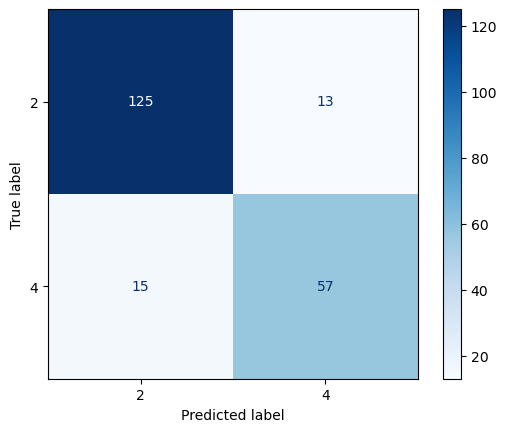

In [115]:
# This method, first performs prediction and then prepares confustion matrix
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

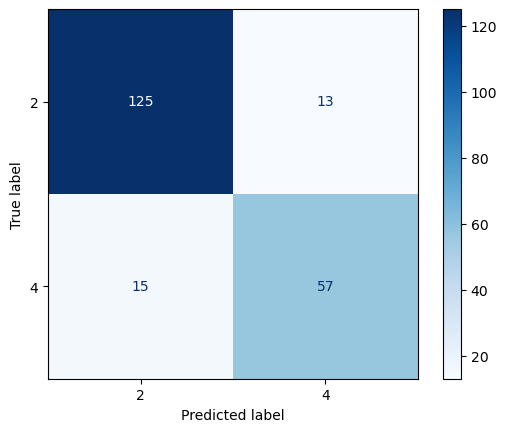

In [116]:
# Prpare confusion matrix using actual and predicted values
metrics.ConfusionMatrixDisplay.from_predictions( y_test, y_pred, cmap='Blues')